In [2]:
# Pakages

import os
import pathlib

# Current working directory

WorkingDirectoty = str(pathlib.Path().absolute()) 

# Where to save the figures and data files

NameSaveOutput =  "Results-illustration-MC"                       # Name where saves the output 
PROJECT_ROOT_DIR = WorkingDirectoty +"/"+ NameSaveOutput          # Direction to creat 
FIGURE_ID = PROJECT_ROOT_DIR + "/FigureFiles" 
DATA_ID = PROJECT_ROOT_DIR + "/DataFile"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

#FigureSaveName = "VMCHarmonic"
#NameSaveData = "VMCHarmonic.dat"


-------------------------------------------------------------
Value of pi ~ 3.072 |  Number Monte Carlos cycles 1000
-------------------------------------------------------------
AreaCircle ~ 3.072  |  Number Monte Carlos cycles 1000
-------------------------------------------------------------
Error value pi= 0.06959265358979305
-------------------------------------------------------------
Error Area = 0.06959265358979305
-------------------------------------------------------------

---------------------------------------------------------------
CPU time consuming
---------------------------------------------------------------
CPU time = 0.10832929611206055 seconds
CPU time = 0.0018054882685343424 minutes
CPU time = 3.009147114223904e-05 hours
---------------------------------------------------------------
---------------------------------------------------------------


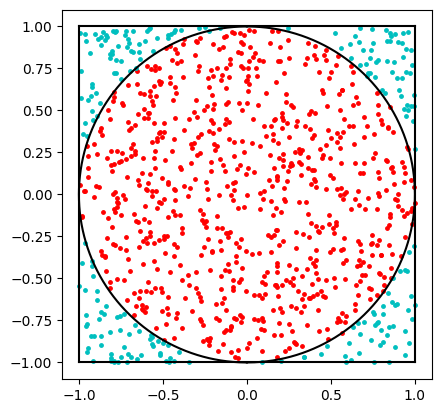

In [11]:
#---------------------------------------------------------------------#
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
#---------------------------------------------------------------------#
import time
inicio = time.time()
#---------------------------------------------------------------------#

# Parameters and initial conditions
radius = 1
NumberPointInside = 0
NumberMCcycles = 10**3

XInside = np.array([]) 
YInside = np.array([]) 
XOutside = np.array([]) 
YOutside = np.array([]) 
#---------------------------------------------------------------------#
def Circle(x):
    y = np.sqrt(radius**2 - x**2)
    return y
x_plot = np.linspace(-radius,radius, 10000)
#---------------------------------------------------------------------#

# Monte Carlos Method
for i in range(NumberMCcycles):
    x = np.random.uniform(-radius,radius)
    y = np.random.uniform(-radius,radius)
    if sqrt(x*x + y*y) <= radius:
        NumberPointInside += 1
        XInside = np.append(XInside,x)
        YInside = np.append(YInside,y)
    if sqrt(x*x+y*y) > radius:
        XOutside = np.append(XOutside,x)
        YOutside = np.append(YOutside,y)
#---------------------------------------------------------------------#
        
# Make a square
LineH1 = -radius*np.ones(100)
LineH2 =  radius*np.ones(100)
LoneV1 = -radius*np.ones(100)
LoneV2 =  radius*np.ones(100)
line_plot = np.linspace(-radius,radius,100)
#---------------------------------------------------------------------#
fig, ax = plt.subplots(1)
ax.scatter(XInside, YInside,s= 6.1, c='r', alpha=1, edgecolor=None)
ax.scatter(XOutside, YOutside,s=6.1, c='c', alpha=1, edgecolor=None)
#---------------------------------------------------------------------#

# Plot circle 
ax.plot(Circle(x_plot),x_plot,'k')
ax.plot(-Circle(x_plot),x_plot,'k')
#---------------------------------------------------------------------#

# Plot square
ax.plot(LineH1,line_plot,'k')
ax.plot(LineH2,line_plot,'k')
ax.plot(line_plot,LoneV1,'k')
ax.plot(line_plot,LoneV2,'k')
#---------------------------------------------------------------------#
ax.set_aspect('equal')
plt.savefig(image_path("VMC-ilustration-"+ str(NumberMCcycles)) + ".png", format='png')
#---------------------------------------------------------------------#

# Caculate the area
Probability = NumberPointInside/NumberMCcycles 
AreaSquare = 4*radius*radius
AreaCircle = AreaSquare*Probability
#---------------------------------------------------------------------#

# Calculate the number pi
NumberPi = 4*NumberPointInside/NumberMCcycles
#------------------------radius---------------------------------------------#

# Calculate the error
ErrorPi = np.abs(np.pi-NumberPi)
ErrorArea = np.abs(np.pi*radius**2-AreaCircle)
#---------------------------------------------------------------------#
print('-------------------------------------------------------------')
print('Value of pi ~',NumberPi, '| ','Number Monte Carlos cycles',NumberMCcycles)
print('-------------------------------------------------------------')
print('AreaCircle ~', AreaCircle, ' | ','Number Monte Carlos cycles',NumberMCcycles)
print('-------------------------------------------------------------')
print('Error value pi=',ErrorPi)
print('-------------------------------------------------------------')
print('Error Area =', ErrorArea)
print('-------------------------------------------------------------')
print()
#---------------------------------------------------------------------#
fin = time.time()
print("---------------------------------------------------------------")
print('CPU time consuming')
print("---------------------------------------------------------------")
print("CPU time =",fin-inicio, "seconds")
print("CPU time =",(fin-inicio)/60, "minutes")
print("CPU time =",(fin-inicio)/3600, "hours")
print("---------------------------------------------------------------")
print("---------------------------------------------------------------")

-------------------------------------------------------------
Value of pi ~ 3.1420339200000016
-------------------------------------------------------------
Area circle ~ 3.1420339200000016
-------------------------------------------------------------
Number repetitions 1000 |Number Monte Carlos cycles 50000
-------------------------------------------------------------
Error value pi = 0.05840734641020706
-------------------------------------------------------------
Error Area = 0.05840734641020706
-------------------------------------------------------------

-------------------------------------------------------------

Relative error between Averange and just one Monte Carlos cycle

-------------------------------------------------------------
Relative error pi = -0.05796607999999859
-------------------------------------------------------------
Relative error area = -0.05796607999999859
-------------------------------------------------------------


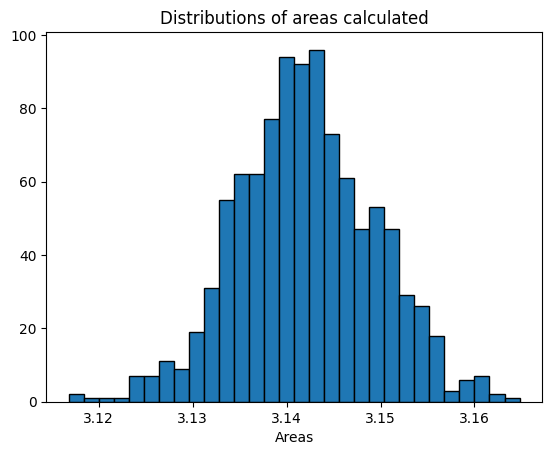

---------------------------------------------------------------
CPU time consuming
---------------------------------------------------------------
CPU time = 209.71722149848938 seconds
CPU time = 3.495287024974823 minutes
CPU time = 0.05825478374958038 hours
---------------------------------------------------------------
---------------------------------------------------------------


In [6]:
# Averange over Monte Carlos Cicles
#---------------------------------------------------------------------#
# Time CPU
inicio = time.time()
#---------------------------------------------------------------------#
NumberRepetitions = 10**3
AreaCircleAverange = 0 
NumberPiAverange = 0
#---------------------------------------------------------------------#
AreaCircleRepetitions = np.array([])
NumberPiRepetitions = np.array([])
#---------------------------------------------------------------------#
for Averange in range(NumberRepetitions):
    # Parameters and initial conditions
    radius = 1
    NumberMCcycles = 50000
    #---------------------------------------------------------------------#
    # Monte Carlos Method
    NumberPointInside = 0
    for i in range(NumberMCcycles):
        x = np.random.uniform(-radius,radius)
        y = np.random.uniform(-radius,radius)
        if sqrt(x*x + y*y) <= radius:
            NumberPointInside += 1
    #---------------------------------------------------------------------#
    # Calculating the areas in each repetitions
    Probability = NumberPointInside/NumberMCcycles 
    AreaSquare = 4*radius*radius
    AreaCircle = AreaSquare*Probability
    NumberPi = 4*NumberPointInside/NumberMCcycles
    #---------------------------------------------------------------------#
    # Saving the diferent area velues 
    AreaCircleRepetitions = np.append(AreaCircleRepetitions,AreaCircle)
    NumberPiRepetitions = np.append(NumberPiRepetitions,NumberPi)
    AreaCircleAverange += AreaCircle
    NumberPiAverange += NumberPi
#---------------------------------------------------------------------#
#Calcuate the averange area values
AreaCircleAverange /= NumberRepetitions
NumberPiAverange /= NumberRepetitions
#---------------------------------------------------------------------#
# Calculate the error
ErrorPiAverange = np.abs(np.pi-NumberPiAverange)
ErrorAreaAverange = np.abs(np.pi*radius**2-AreaCircleAverange)
#---------------------------------------------------------------------#
# Print the different important values
print('-------------------------------------------------------------')
print('Value of pi ~',NumberPiAverange)
print('-------------------------------------------------------------')
print('Area circle ~', AreaCircleAverange)
print('-------------------------------------------------------------')
print('Number repetitions',NumberRepetitions,'|Number Monte Carlos cycles',NumberMCcycles)
print('-------------------------------------------------------------')
print('Error value pi =',ErrorPi)
print('-------------------------------------------------------------')
print('Error Area =', ErrorArea)
print('-------------------------------------------------------------')
#---------------------------------------------------------------------#
print()
# Print the relative error 
print('-------------------------------------------------------------')
print()
print('Relative error between Averange and just one Monte Carlos cycle')
print()
RelativeErrorPi = ErrorPiAverange - ErrorPi
RelativeErrorArea = ErrorAreaAverange - ErrorArea
print('-------------------------------------------------------------')
print('Relative error pi =', RelativeErrorPi)
print('-------------------------------------------------------------')
print('Relative error area =',RelativeErrorArea )
print('-------------------------------------------------------------')
#---------------------------------------------------------------------#
# Details of the plot to be generated 
# Sets the title of the plot  
plt.title("Distributions of areas calculated") 
# 3 parameters(to be made, bins, separators colour between the numeber beams) ) 
plt.hist (AreaCircleRepetitions, bins=30, ec="black")  
#plt.plot(f(AreaCircleRepetitions), AreaCircleRepetitions)
# sets the label of the x-axis of the plot 
plt.xlabel("Areas") 
plt.savefig(image_path("VMC-ilustration-Hist-Rep-"+str(NumberRepetitions)) + ".png", format='png')
plt.show() # shows the plot
#---------------------------------------------------------------------#

#---------------------------------------------------------------------#
fin = time.time()
print("---------------------------------------------------------------")
print('CPU time consuming')
print("---------------------------------------------------------------")
print("CPU time =",fin-inicio, "seconds")
print("CPU time =",(fin-inicio)/60, "minutes")
print("CPU time =",(fin-inicio)/3600, "hours")
print("---------------------------------------------------------------")
print("---------------------------------------------------------------")

In [5]:
#---------------------------------------------------------------------#
# limits of integration 
a = -4
b =  4
NumberMCcycles = 10**7
#---------------------------------------------------------------------#
# Define of funtion to integrated
def f(x): 
    return np.exp(-x**2)
#----------------------------radius-----------------------------------------#

# Integrate with Monte Carlos
def MCIntegration(f,a,b,NumberMCcycles):
    Area = 0
    #xValues = np.array([]) 
    for i in range(NumberMCcycles):
        xValue = np.random.uniform(a,b)
        #xValues = np.append(xValues,xValue)
        Area +=f(xValue) 
    AreaOutput= (b-a)/float(NumberMCcycles)*Area
    return AreaOutput
#---------------------------------------------------------------------#
print('-------------------------------------------------------------')
print('MC Integral ~', MCIntegration(f,a,b,NumberMCcycles))
print('-------------------------------------------------------------')
#---------------------------------------------------------------------#

-------------------------------------------------------------
MC Integral ~ 1.7739697013356976
-------------------------------------------------------------


-------------------------------------------------------------
MC Integral ~ 1.7801953167561666
-------------------------------------------------------------


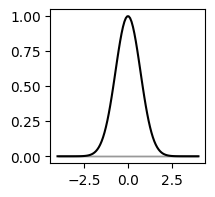

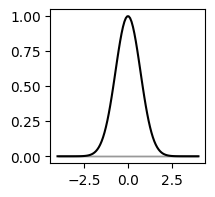

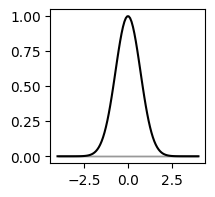

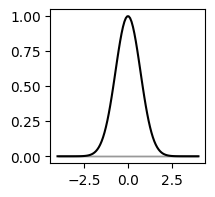

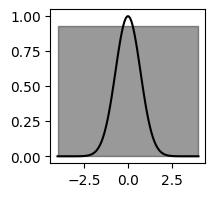

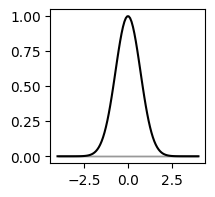

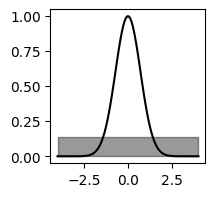

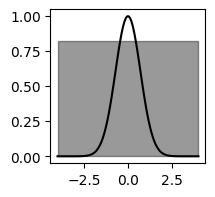

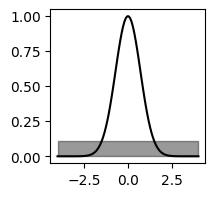

In [7]:
#---------------------------------------------------------------------#
# limits of integration 
a = -4
b = 4# gets the value of pi 
NumberMCcycles = 9
#---------------------------------------------------------------------#
# Define of funtion to integrated
def f(x): 
    return np.exp(-x**2)
#---------------------------------------------------------------------#

# Integrate with Monte Carlos
def MCIntegration(f,a,b,NumberMCcycles):
    Area = 0
    x_plot =np.linspace(a,b,100)
    xValues = np.array([]) 
    for i in range(NumberMCcycles):
        xValue = np.random.uniform(a,b)
        xValues = np.append(xValues,xValue)
        Area +=f(xValue) 
        f_plot = f(xValue)*np.ones(len(x_plot))
        #plt.plot(x_plot,f_plot,) 
        fig, ax1 = plt.subplots(1,sharex=True, figsize=(2, 2))
        ax1.fill_between(x = x_plot, y1 = f_plot,alpha = 0.4, color = "k",)
        ax1.plot(x_plot,f(x_plot),'k')
        plt.savefig(image_path("MCI-ilustration"+str(i)) + ".png", format='png')
    AreaOutput= (b-a)/float(NumberMCcycles)*Area
    return AreaOutput
#---------------------------------------------------------------------#
print('-------------------------------------------------------------')
print('MC Integral ~', MCIntegration(f,a,b,NumberMCcycles))
print('-------------------------------------------------------------')
#---------------------------------------------------------------------#

    ----------------------------------------------------------------
           Area ~ 1.872  |  Number Monte Carlos cycles 1000
    ----------------------------------------------------------------
      Area using Gauss quadrature integration ~ 1.7724538235791378
      Gauss quadrature integration error = 2.6360298943650662e-08
    ----------------------------------------------------------------

---------------------------------------------------------------
CPU time consuming
---------------------------------------------------------------
CPU time = 0.13118195533752441 seconds
CPU time = 0.0021863659222920735 minutes
CPU time = 3.643943203820122e-05 hours
---------------------------------------------------------------
---------------------------------------------------------------


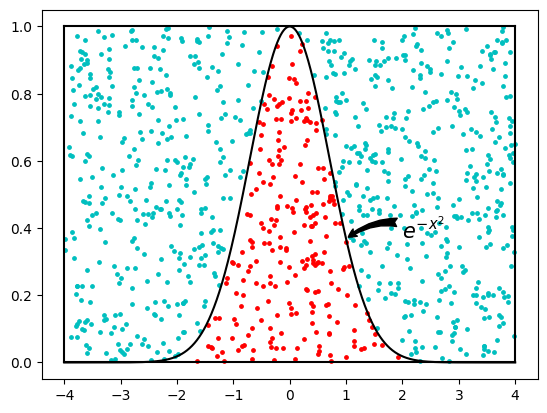

In [12]:
#---------------------------------------------------------------------#
# Time CPU
inicio = time.time()
#---------------------------------------------------------------------#
# Here starts the main program with variable declarations
a = -4
b = 4

c = 0
d = 1

NumberMCcycles = 10**3
NumberPointInside = 0

XInside = np.array([]) 
YInside = np.array([]) 
XOutside = np.array([]) 
YOutside = np.array([]) 
#---------------------------------------------------------------------#
x_plot = np.linspace(a,b, 10000)
#---------------------------------------------------------------------#
# Monte Carlos Method
for i in range(NumberMCcycles):
    x = np.random.uniform(a,b)
    y = np.random.uniform(c,d)
    if y - f(x) <= 0:
        NumberPointInside += 1
        XInside = np.append(XInside,x)
        YInside = np.append(YInside,y)
    if y - f(x) > 0:
        XOutside = np.append(XOutside,x)
        YOutside = np.append(YOutside,y)

#---------------------------------------------------------------------#
fig, ax = plt.subplots(1)
ax.scatter(XInside, YInside,s= 6.0, c='r', alpha= 1, edgecolor=None)
ax.scatter(XOutside, YOutside,s=6.0, c='c', alpha=1, edgecolor=None)
ax.plot(x_plot,f(x_plot),'k')
plt.annotate('$e^{-x^2}$',
             size=15,
             xy=[1,f(1)],
             xytext=[2,f(1)],
             arrowprops = dict(arrowstyle="fancy",color="black",connectionstyle="arc3,rad=0.3"),)
#---------------------------------------------------------------------#
# Plot square

LineV1 = b*np.ones(100)
LineV2 = a*np.ones(100)
LineH1 = d*np.ones(100)
LineH2 = c*np.ones(100)
lineh_plot = np.linspace(a,b,100)
linev_plot = np.linspace(c,d,100)

ax.plot(LineV1,linev_plot,'k')
ax.plot(LineV2,linev_plot,'k')
ax.plot(lineh_plot,LineH1,'k')
ax.plot(lineh_plot,LineH2,'k')
#---------------------------------------------------------------------#
plt.savefig(image_path("VMC-ilustration-Gauss-"+str(NumberRepetitions)) + ".png", format='png')
#ax.set_aspect('equal')

#---------------------------------------------------------------------#
# Caculate the area
Probability = NumberPointInside/NumberMCcycles 
lx = b-a
ly = d-c
AreaSquare = lx*ly 
AreaG = AreaSquare*Probability
#---------------------------------------------------------------------#
#Integrate the funtion using Gauss quadrature
import scipy.integrate as integrate
I = integrate.quad(f,a,b)
#---------------------------------------------------------------------#
print('    ----------------------------------------------------------------')
print('           Area ~', AreaG, ' | ','Number Monte Carlos cycles',NumberMCcycles)
print('    ----------------------------------------------------------------')
print('      Area using Gauss quadrature integration ~',I[0])
print('      Gauss quadrature integration error =', I[1])
print('    ----------------------------------------------------------------')
print()
#---------------------------------------------------------------------#

fin = time.time()
print("---------------------------------------------------------------")
print('CPU time consuming')
print("---------------------------------------------------------------")
print("CPU time =",fin-inicio, "seconds")
print("CPU time =",(fin-inicio)/60, "minutes")
print("CPU time =",(fin-inicio)/3600, "hours")
print("---------------------------------------------------------------")
print("---------------------------------------------------------------")


Text(2, 0.6, '$w_i/w_j \\geq 1$')

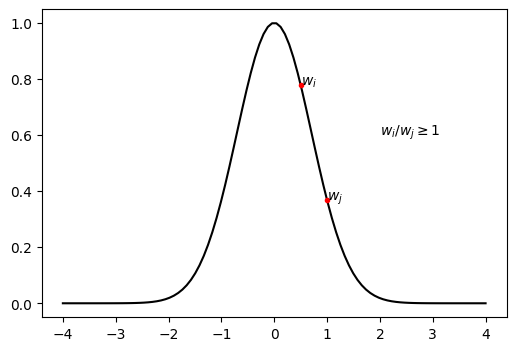

In [41]:

#---------------------------------------------------------------------#
def f(x): 
    return np.exp(-x**2)
#---------------------------------------------------------------------#
x_plot =np.linspace(-4,4,100)
fig, ax1 = plt.subplots(1,sharex=True, figsize=(6, 4))
ax1.plot(x_plot,f(x_plot),'k')
plt.annotate('$w_i$',
             size=10,
             xy=[0.5,f(0.5)],
             xytext=[0.5,f(0.5)])
ax1.plot(0.5,f(0.5),'r.')
plt.annotate('$w_j$',
             size=10,
             xy=[1,f(1)],
             xytext=[1,f(1)])
ax1.plot(1,f(1),'r.')
plt.annotate('$w_i/w_j \geq 1$',
             size=10,
             xy=[2,f(2)],
             xytext=[2,0.6])
